![slogan](./assets/slogan.jpeg)

# Intelligent analysis of ecological assets by Using Keras-Segmentation Package

2021全国数字生态创新大赛——智能算法赛：生态资产智能分析 [赛事链接](https://tianchi.aliyun.com/competition/entrance/531860/introduction?spm=5176.21174431.J_3123622140.1.63d5fafbvoMuzd)<br>
Keras Segmentation Github Link: https://github.com/divamgupta/image-segmentation-keras

# Preparing Dataset

## Setup

In [1]:
import os
import random
import numpy as np
from tqdm import tqdm
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt


root = Path('/home/gqj/datasets/suichang/')
images_dir = root / 'suichang_round1_train_210120/original_images'
seg_dir = root / 'suichang_round1_train_210120/segmentation'
out_seg_dir = root / 'suichang_round1_train_210120/segmentation_minus_one'

## Convert segmentation from [1-10] to [0-9]

In [2]:
if not os.path.exists(out_seg_dir):
    os.makedirs(out_seg_dir)

seg_fnames = os.listdir(seg_dir)

for seg_fname in tqdm(seg_fnames):
    seg_fpath = os.path.join(seg_dir, seg_fname)
    img = Image.open(seg_fpath)
    img = Image.fromarray(np.asarray(img) - 1)
    img.save(os.path.join(out_seg_dir, seg_fname))

100%|██████████| 16017/16017 [04:38<00:00, 57.61it/s]


## Have a glance

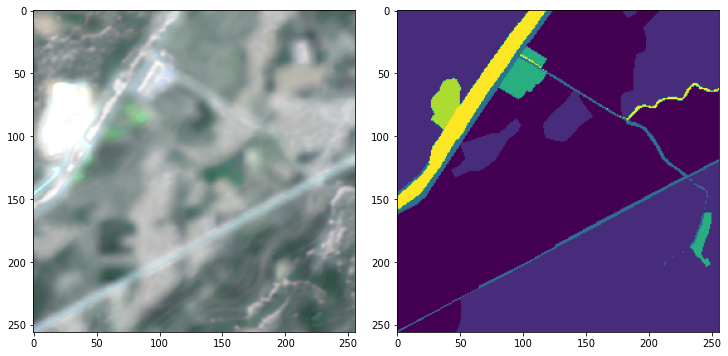

In [3]:
rand_number = random.randint(1, 16017) 
original_img = images_dir / f'{rand_number:06}.tif'
seg_img = out_seg_dir / f'{rand_number:06}.png'

fig, axs = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

axs[0].imshow(Image.open(original_img))
axs[0].grid(False)

axs[1].imshow(Image.open(seg_img))
axs[1].grid(False)

# Train

In [5]:
from keras_segmentation.models.segnet import resnet50_segnet

model = resnet50_segnet(n_classes=10, input_height=256, input_width=256, channels=4)

model.train(
    train_images=images_dir,
    train_annotations=out_seg_dir,
    epochs=30,
#     batch_size=16,
    verify_dataset=False,
    checkpoints_path='./runs/checkpoints',
    read_image_type=-1,
)

Epoch 1/30
511/512 [============================>.] - ETA: 0s - loss: 1.0182 - accuracy: 0.7423
Epoch 00001: saving model to ./runs/checkpoints.00001
512/512 [==============================] - 17s 33ms/step - loss: 1.0170 - accuracy: 0.7425
Epoch 2/30
511/512 [============================>.] - ETA: 0s - loss: 0.7228 - accuracy: 0.7615
Epoch 00002: saving model to ./runs/checkpoints.00002
512/512 [==============================] - 17s 32ms/step - loss: 0.7220 - accuracy: 0.7618
Epoch 3/30
511/512 [============================>.] - ETA: 0s - loss: 0.6701 - accuracy: 0.7739
Epoch 00003: saving model to ./runs/checkpoints.00003
512/512 [==============================] - 17s 33ms/step - loss: 0.6718 - accuracy: 0.7734
Epoch 4/30
511/512 [============================>.] - ETA: 0s - loss: 0.6384 - accuracy: 0.7836
Epoch 00004: saving model to ./runs/checkpoints.00004
512/512 [==============================] - 17s 32ms/step - loss: 0.6384 - accuracy: 0.7836
Epoch 5/30
511/512 [================

# Prediction

## Visualizing the result

In [6]:
test_images_dir = root / 'suichang_round1_test_partA_210120'
rand_number = random.randint(1, 3000)
test_image_path = str(test_images_dir / f'{rand_number:06d}.tif')

predict = model.predict_segmentation(test_image_path, read_image_type=-1)
predict.shape


(128, 128)

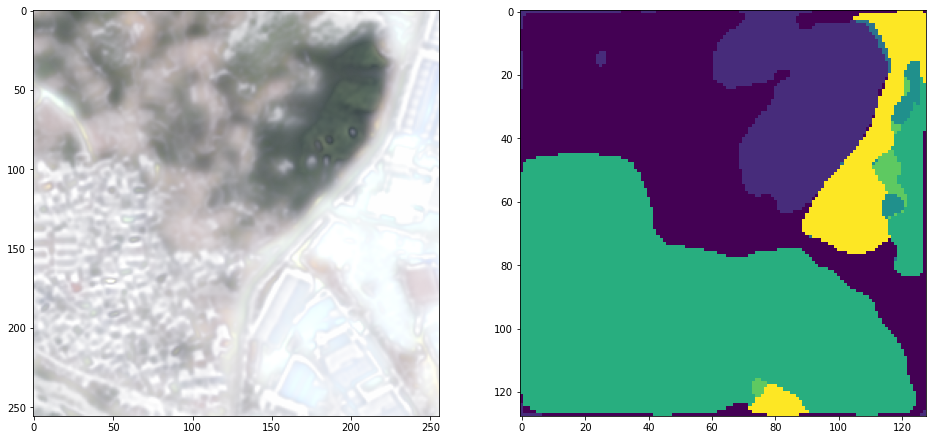

In [7]:
test_images_dir = root / 'suichang_round1_test_partA_210120'
rand_number = random.randint(1, 3000)

colors=[(0,0,1),(0,0,2),(0,0,3),(0,0,4),(0,0,5),(0,0,6),(0,0,7),(0,0,8),(0,0,9),(0,0,10)]
test_image_path = str(test_images_dir / f'{rand_number:06d}.tif')
predict = model.predict_segmentation(test_image_path, read_image_type=-1)

fig, axs = plt.subplots(1, 2, figsize=(16, 8))

axs[0].imshow(Image.open(test_image_path))

axs[1].imshow(predict)

In [8]:
results_dir = Path('./runs/results')

colors = [(0,0,1),(0,0,2),(0,0,3),(0,0,4),(0,0,5),(0,0,6),(0,0,7),(0,0,8),(0,0,9),(0,0,10)]

if not os.path.exists(results_dir):
  os.makedirs(results_dir)

for img_name in tqdm(os.listdir(test_images_dir)):
  img_path = test_images_dir / img_name
  out_path = results_dir / img_name.replace('.tif', '.png')
  model.predict_segmentation(str(img_path), out_fname=str(out_path), colors=colors, read_image_type=-1)

  img = np.asarray(Image.open(out_path))
  img = Image.fromarray(np.sum(img, axis=2, dtype='uint8'))
  img.save(out_path)



100%|██████████| 3000/3000 [02:05<00:00, 23.85it/s]


In [9]:
!zip runs/results.zip runs/results/*

updating: runs/results/000001.png (deflated 45%)
updating: runs/results/000002.png (deflated 3%)
updating: runs/results/000003.png (deflated 7%)
updating: runs/results/000004.png (deflated 32%)
updating: runs/results/000005.png (deflated 4%)
updating: runs/results/000006.png (deflated 34%)
updating: runs/results/000007.png (deflated 4%)
updating: runs/results/000008.png (stored 0%)
updating: runs/results/000009.png (deflated 3%)
updating: runs/results/000010.png (deflated 13%)
updating: runs/results/000011.png (deflated 13%)
updating: runs/results/000012.png (stored 0%)
updating: runs/results/000013.png (deflated 2%)
updating: runs/results/000014.png (stored 0%)
updating: runs/results/000015.png (deflated 8%)
updating: runs/results/000016.png (deflated 8%)
updating: runs/results/000017.png (deflated 13%)
updating: runs/results/000018.png (deflated 7%)
updating: runs/results/000019.png (deflated 18%)
updating: runs/results/000020.png (deflated 0%)
updating: runs/results/000021.png (defl

updating: runs/results/000208.png (deflated 25%)
updating: runs/results/000209.png (deflated 25%)
updating: runs/results/000210.png (deflated 52%)
updating: runs/results/000211.png (stored 0%)
updating: runs/results/000212.png (deflated 19%)
updating: runs/results/000213.png (deflated 42%)
updating: runs/results/000214.png (deflated 31%)
updating: runs/results/000215.png (deflated 24%)
updating: runs/results/000216.png (deflated 13%)
updating: runs/results/000217.png (stored 0%)
updating: runs/results/000218.png (deflated 1%)
updating: runs/results/000219.png (deflated 3%)
updating: runs/results/000220.png (deflated 8%)
updating: runs/results/000221.png (deflated 13%)
updating: runs/results/000222.png (stored 0%)
updating: runs/results/000223.png (stored 0%)
updating: runs/results/000224.png (deflated 47%)
updating: runs/results/000225.png (deflated 2%)
updating: runs/results/000226.png (deflated 2%)
updating: runs/results/000227.png (deflated 1%)
updating: runs/results/000228.png (sto

updating: runs/results/000653.png (deflated 0%)
updating: runs/results/000654.png (deflated 15%)
updating: runs/results/000655.png (deflated 3%)
updating: runs/results/000656.png (deflated 32%)
updating: runs/results/000657.png (deflated 16%)
updating: runs/results/000658.png (deflated 1%)
updating: runs/results/000659.png (deflated 26%)
updating: runs/results/000660.png (deflated 0%)
updating: runs/results/000661.png (deflated 20%)
updating: runs/results/000662.png (deflated 11%)
updating: runs/results/000663.png (deflated 1%)
updating: runs/results/000664.png (deflated 0%)
updating: runs/results/000665.png (deflated 0%)
updating: runs/results/000666.png (deflated 3%)
updating: runs/results/000667.png (stored 0%)
updating: runs/results/000668.png (deflated 6%)
updating: runs/results/000669.png (deflated 15%)
updating: runs/results/000670.png (deflated 13%)
updating: runs/results/000671.png (deflated 5%)
updating: runs/results/000672.png (stored 0%)
updating: runs/results/000673.png (d

updating: runs/results/001098.png (deflated 10%)
updating: runs/results/001099.png (deflated 2%)
updating: runs/results/001100.png (stored 0%)
updating: runs/results/001101.png (stored 0%)
updating: runs/results/001102.png (deflated 21%)
updating: runs/results/001103.png (deflated 9%)
updating: runs/results/001104.png (deflated 26%)
updating: runs/results/001105.png (stored 0%)
updating: runs/results/001106.png (deflated 4%)
updating: runs/results/001107.png (stored 0%)
updating: runs/results/001108.png (deflated 16%)
updating: runs/results/001109.png (stored 0%)
updating: runs/results/001110.png (deflated 67%)
updating: runs/results/001111.png (stored 0%)
updating: runs/results/001112.png (deflated 2%)
updating: runs/results/001113.png (deflated 41%)
updating: runs/results/001114.png (deflated 2%)
updating: runs/results/001115.png (deflated 19%)
updating: runs/results/001116.png (stored 0%)
updating: runs/results/001117.png (stored 0%)
updating: runs/results/001118.png (deflated 13%)


updating: runs/results/001552.png (deflated 6%)
updating: runs/results/001553.png (stored 0%)
updating: runs/results/001554.png (stored 0%)
updating: runs/results/001555.png (stored 0%)
updating: runs/results/001556.png (deflated 34%)
updating: runs/results/001557.png (stored 0%)
updating: runs/results/001558.png (stored 0%)
updating: runs/results/001559.png (deflated 1%)
updating: runs/results/001560.png (deflated 17%)
updating: runs/results/001561.png (stored 0%)
updating: runs/results/001562.png (deflated 15%)
updating: runs/results/001563.png (deflated 16%)
updating: runs/results/001564.png (deflated 3%)
updating: runs/results/001565.png (deflated 32%)
updating: runs/results/001566.png (stored 0%)
updating: runs/results/001567.png (deflated 49%)
updating: runs/results/001568.png (deflated 33%)
updating: runs/results/001569.png (stored 0%)
updating: runs/results/001570.png (stored 0%)
updating: runs/results/001571.png (deflated 1%)
updating: runs/results/001572.png (stored 0%)
updat

updating: runs/results/002086.png (deflated 2%)
updating: runs/results/002087.png (deflated 9%)
updating: runs/results/002088.png (deflated 2%)
updating: runs/results/002089.png (deflated 78%)
updating: runs/results/002090.png (deflated 27%)
updating: runs/results/002091.png (deflated 2%)
updating: runs/results/002092.png (deflated 6%)
updating: runs/results/002093.png (deflated 20%)
updating: runs/results/002094.png (stored 0%)
updating: runs/results/002095.png (deflated 3%)
updating: runs/results/002096.png (deflated 0%)
updating: runs/results/002097.png (stored 0%)
updating: runs/results/002098.png (deflated 21%)
updating: runs/results/002099.png (stored 0%)
updating: runs/results/002100.png (deflated 23%)
updating: runs/results/002101.png (stored 0%)
updating: runs/results/002102.png (deflated 2%)
updating: runs/results/002103.png (stored 0%)
updating: runs/results/002104.png (deflated 0%)
updating: runs/results/002105.png (stored 0%)
updating: runs/results/002106.png (deflated 3%)

updating: runs/results/002620.png (stored 0%)
updating: runs/results/002621.png (deflated 0%)
updating: runs/results/002622.png (deflated 5%)
updating: runs/results/002623.png (deflated 7%)
updating: runs/results/002624.png (stored 0%)
updating: runs/results/002625.png (deflated 7%)
updating: runs/results/002626.png (stored 0%)
updating: runs/results/002627.png (stored 0%)
updating: runs/results/002628.png (deflated 32%)
updating: runs/results/002629.png (stored 0%)
updating: runs/results/002630.png (deflated 14%)
updating: runs/results/002631.png (deflated 0%)
updating: runs/results/002632.png (stored 0%)
updating: runs/results/002633.png (deflated 3%)
updating: runs/results/002634.png (stored 0%)
updating: runs/results/002635.png (deflated 6%)
updating: runs/results/002636.png (deflated 7%)
updating: runs/results/002637.png (deflated 7%)
updating: runs/results/002638.png (stored 0%)
updating: runs/results/002639.png (stored 0%)
updating: runs/results/002640.png (stored 0%)
updating: 